In [1]:
import time
import pandas as pd
import numpy as np
import math

In [2]:
import scipy.io as sio
matlabData = sio.loadmat('ex3data1.mat')
X = matlabData['X']
y = matlabData['y']
labels = np.unique(y)
labels.sort()

input_layer_size  = 400  
hidden_layer_size = 25   
num_labels = 10         

Part 1: Loading and Visualizing Data

In [3]:
m,n = np.shape(X)
y = y.reshape(m)
nb_rows_to_select = 100
idx = np.random.permutation(m)[:nb_rows_to_select]
sel = X[idx,:]

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
def display_data(X: np.array) -> None:
    m,n = np.shape(X)
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    plt.subplot(display_rows,display_cols,1)
    for i in range(display_rows):
        for j in range(display_cols):
            plt.subplot(display_rows,display_cols,i*display_cols+j+1)
            temp_digit_image = X[i*display_cols+j,:].reshape(20,20).T
            plt.imshow(temp_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')
            plt.axis('off')      
    plt.show()

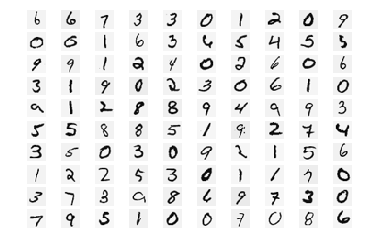

In [6]:
display_data(sel)

Part 2: Loading Pameters

In [7]:
matlabData = sio.loadmat('ex3weights.mat')
print(matlabData.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])


In [8]:
theta1 = matlabData['Theta1']
theta2 = matlabData['Theta2']

Part 3: Implement Predict

In [9]:
def sigmoid(x: np.array) -> np.array:
    return 1/(1+np.exp(-x))
def predict(theta1: np.array, theta2: np.array, X: np.array, labels: np.array) -> np.array:
    m,n = np.shape(X)
    first_layer = sigmoid(np.c_[np.ones(m),X].dot(theta1.T))
    second_layer = sigmoid(np.c_[np.ones(m),first_layer].dot(theta2.T))
    idx = np.argmax(second_layer,axis=1)
    return labels[idx]

In [10]:
pred = predict(theta1, theta2, X,labels)
print('\nTraining Set Accuracy: {:.3f}'.format( np.mean(np.float32(pred == y)) * 100))


Training Set Accuracy: 97.520


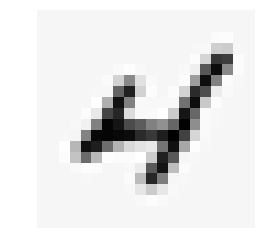


Neural Network Prediction: [4] 
Paused - press enter to continue, q to exit:


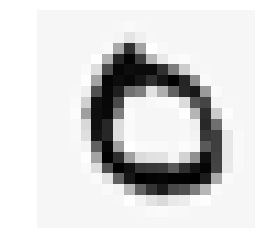


Neural Network Prediction: [10] 
Paused - press enter to continue, q to exit:


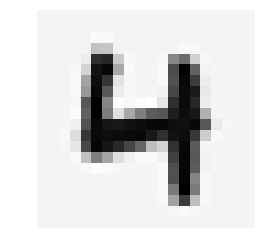


Neural Network Prediction: [4] 
Paused - press enter to continue, q to exit:


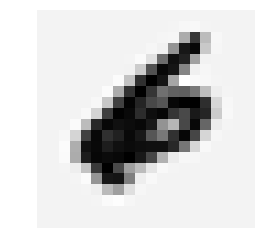


Neural Network Prediction: [6] 
Paused - press enter to continue, q to exit:


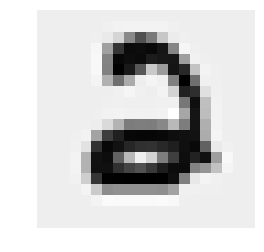


Neural Network Prediction: [2] 
Paused - press enter to continue, q to exit:


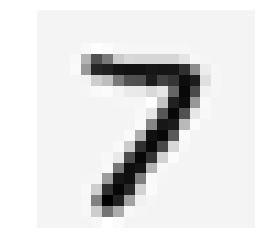


Neural Network Prediction: [7] 
Paused - press enter to continue, q to exit:


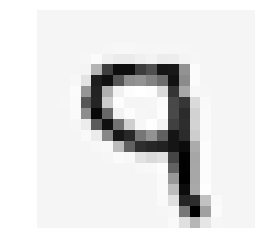


Neural Network Prediction: [9] 
Paused - press enter to continue, q to exit:


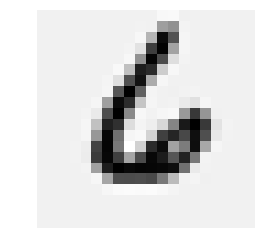


Neural Network Prediction: [6] 
Paused - press enter to continue, q to exit:q


In [11]:
rp = np.random.permutation(m)

for i in range(m):
    row_data =np.array([X[rp[i], :]])
    display_data(row_data)
    pred = predict(theta1, theta2, row_data,labels)
    print('\nNeural Network Prediction: {} '.format(pred))
    
    s = input('Paused - press enter to continue, q to exit:');
    if s == 'q':
      break